In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
calendar = pd.read_csv(r'C:\Users\Germán\Github\Project_Airbnb\Data\calendar.csv')

In [3]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3554304 entries, 0 to 3554303
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  float64
 5   minimum_nights  int64  
 6   maximum_nights  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 189.8+ MB


In [4]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,56766,2024-09-13,f,$130.00,NaN,30,1125
1,56766,2024-09-14,f,$130.00,NaN,30,1125
2,56766,2024-09-15,f,$130.00,NaN,30,1125
3,56766,2024-09-16,f,$130.00,NaN,30,1125
4,56766,2024-09-17,f,$130.00,NaN,30,1125


In [6]:
#Contar cuantos listings id diferentes hay en el dataset
calendar['listing_id'].nunique()

9738

In [7]:
#Nulos 
calendar.isnull().sum()

listing_id              0
date                    0
available               0
price                   0
adjusted_price    3554304
minimum_nights          0
maximum_nights          0
dtype: int64

In [8]:
print(calendar[calendar['listing_id'] == 28169596])

         listing_id        date available      price  adjusted_price  \
1226400    28169596  2024-09-13         f  $1,000.00             NaN   
1226401    28169596  2024-09-14         f  $1,000.00             NaN   
1226402    28169596  2024-09-15         f  $1,000.00             NaN   
1226403    28169596  2024-09-16         f  $1,000.00             NaN   
1226404    28169596  2024-09-17         f  $1,000.00             NaN   
...             ...         ...       ...        ...             ...   
1226760    28169596  2025-09-08         f  $1,000.00             NaN   
1226761    28169596  2025-09-09         f  $1,000.00             NaN   
1226762    28169596  2025-09-10         f  $1,000.00             NaN   
1226763    28169596  2025-09-11         f  $1,000.00             NaN   
1226764    28169596  2025-09-12         f  $1,000.00             NaN   

         minimum_nights  maximum_nights  
1226400               1            1125  
1226401               1            1125  
1226402  

In [12]:
# Filtrar los datos para el año 2024
calendar_2024 = calendar[calendar['year'] == 2024]

# Calcular el promedio de los precios por mes
average_price_per_month_2024 = calendar_2024.groupby('month')['price'].mean()

# Mostrar la tabla
print(average_price_per_month_2024)

month
9     113.214931
10    113.214931
11    113.214931
12    113.214931
Name: price, dtype: float64


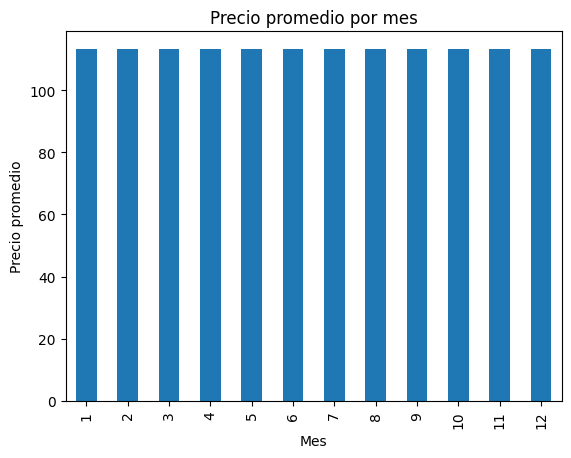

In [9]:
#Precio promedio por mes del año
calendar['date'] = pd.to_datetime(calendar['date'])
calendar['month'] = calendar['date'].dt.month
calendar['year'] = calendar['date'].dt.year
calendar['day'] = calendar['date'].dt.day
calendar['weekday'] = calendar['date'].dt.weekday

calendar['price'] = calendar['price'].str.replace('$', '')
calendar['price'] = calendar['price'].str.replace(',', '')
calendar['price'] = calendar['price'].astype(float)


calendar.groupby('month')['price'].mean().plot(kind='bar')
plt.title('Precio promedio por mes')
plt.xlabel('Mes')
plt.ylabel('Precio promedio')
plt.show()